<a href="https://colab.research.google.com/github/madxmrrw/Stats-Book-1/blob/main/Morrow_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [69]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [70]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [72]:
url = "https://docs.google.com/presentation/d/1CVboAqSjaT9pJtgh3QxNhK9KXIojqRFmnCoTZs8EwTE/edit#slide=id.g1b9d28f1ffc_0_0"

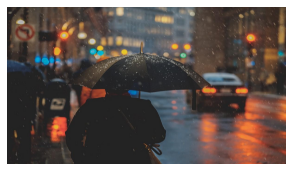

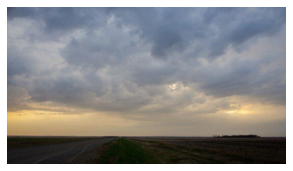

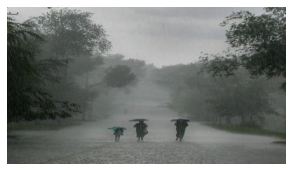

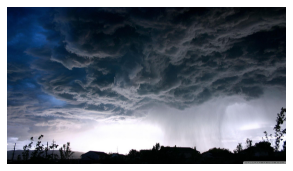

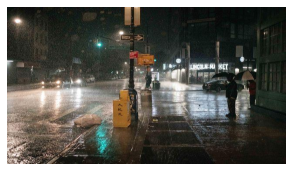

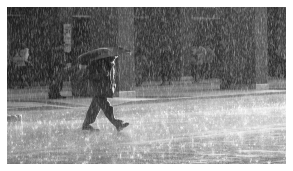

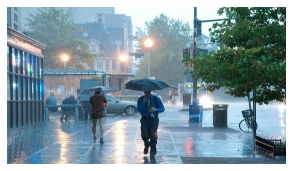

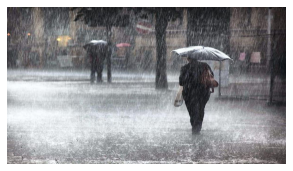

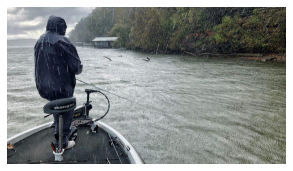

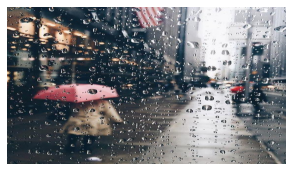

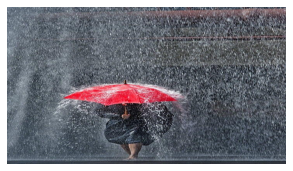

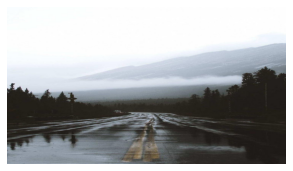

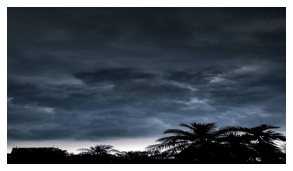

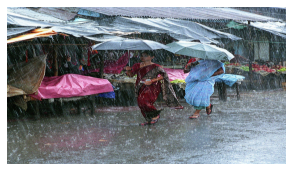

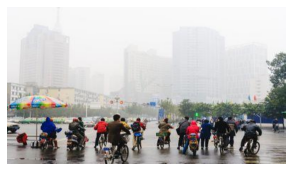

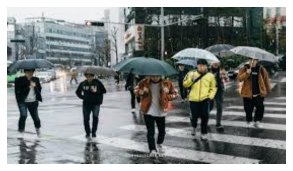

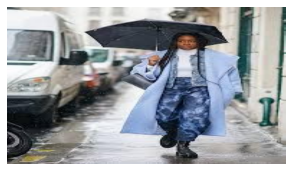

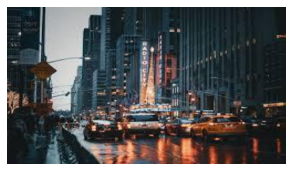

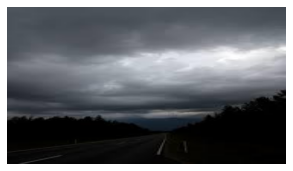

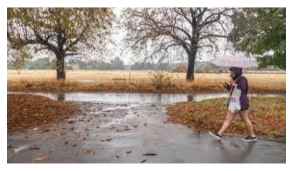

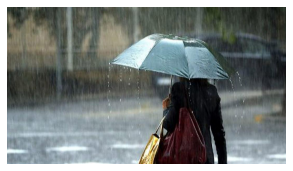

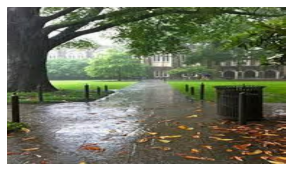

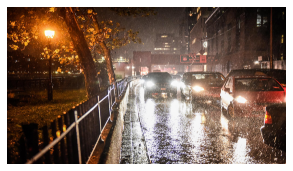

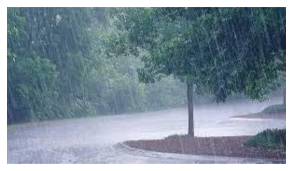

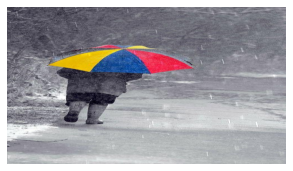

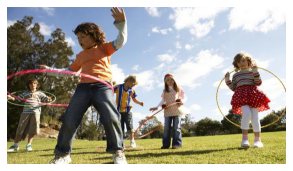

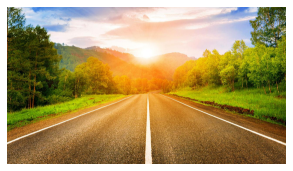

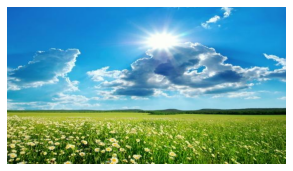

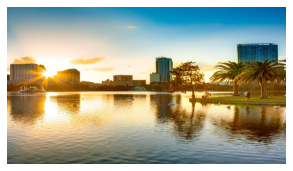

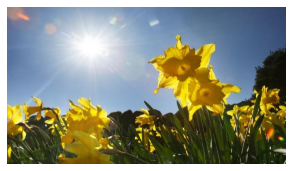

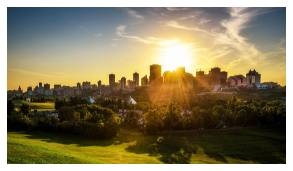

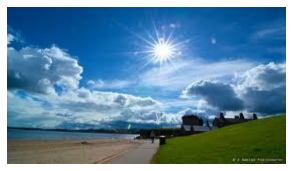

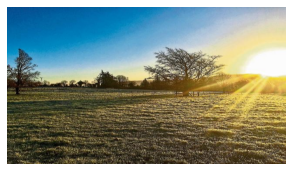

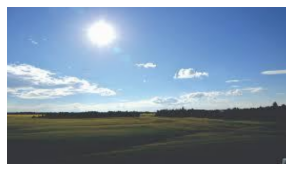

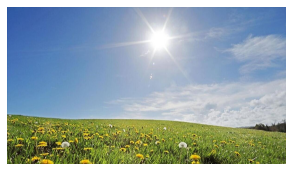

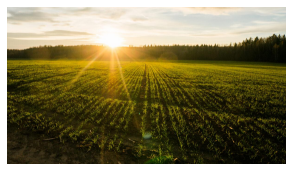

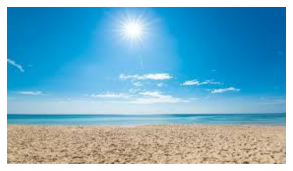

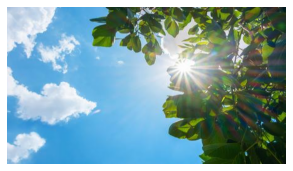

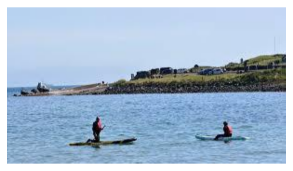

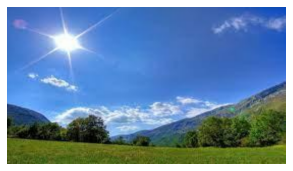

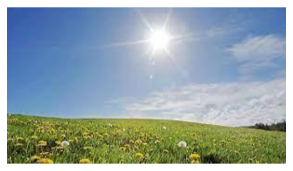

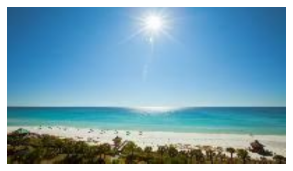

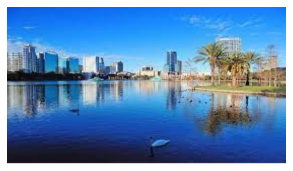

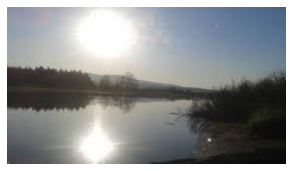

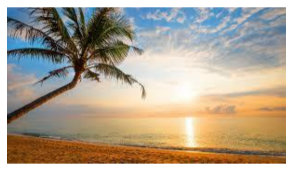

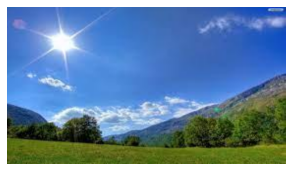

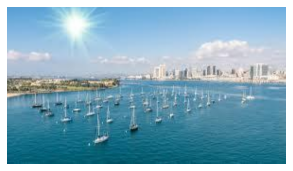

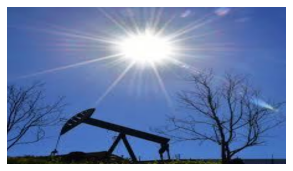

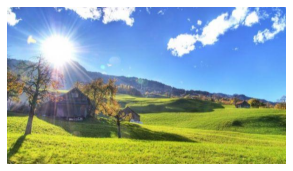

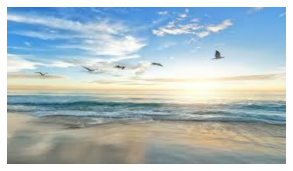

In [73]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [74]:
images.shape

torch.Size([50, 3, 224, 224])

In [75]:
model(images)

tensor([[ 0.3050, -0.9475, -0.2703,  ..., -1.1914,  1.1331, -3.1919],
        [ 1.1451, -1.1285, -1.7002,  ..., -2.6004,  2.3524, -1.0096],
        [ 1.6655, -1.9549,  4.2403,  ..., -5.1401, -4.9984, -1.0911],
        ...,
        [-1.4029, -0.8273,  1.4373,  ..., -2.9485,  1.7609, -0.0293],
        [ 2.2999,  0.0755, -3.8358,  ..., -2.9665,  2.3258, -1.1445],
        [ 0.6319, -1.5481,  2.4754,  ..., -4.4039,  0.9260, -1.7905]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [76]:
y = model(images)

In [77]:
y.shape

torch.Size([50, 1000])

In [78]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [79]:
for i in list(guesses):
    print(labels[i]) # for all in list of guesses then the labels will be pointed

Rottweiler
megalith, megalithic structure
geyser
alp
mosque
fountain
umbrella
bison
snowmobile
jigsaw puzzle
umbrella
breakwater, groin, groyne, mole, bulwark, seawall, jetty
breakwater, groin, groyne, mole, bulwark, seawall, jetty
sarong
geyser
jinrikisha, ricksha, rickshaw
ski mask
drilling platform, offshore rig
airship, dirigible
park bench
umbrella
lakeside, lakeshore
stage
geyser
umbrella
rugby ball
wing
rapeseed
lakeside, lakeshore
rapeseed
castle
lakeside, lakeshore
maze, labyrinth
seashore, coast, seacoast, sea-coast
rapeseed
hay
seashore, coast, seacoast, sea-coast
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
paddle, boat paddle
alp
rapeseed
seashore, coast, seacoast, sea-coast
lakeside, lakeshore
geyser
seashore, coast, seacoast, sea-coast
valley, vale
lakeside, lakeshore
solar dish, solar collector, solar furnace
alp
seashore, coast, seacoast, sea-coast


In [80]:
Y = np.zeros(50,)
Y[25:] = 1

In [81]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
X = y.detach().cpu().numpy() 

In [83]:
X.shape

(50, 1000)

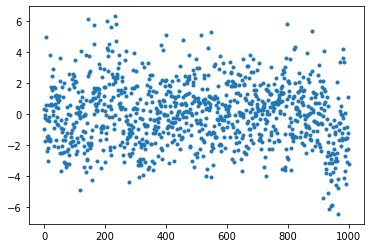

In [84]:
plt.plot(X[0],'.') # SCATTERED PLOT WITH DOTS

In [85]:
X[0] # points at which x = 0

array([ 3.05007815e-01, -9.47513461e-01, -2.70267367e-01, -1.72650921e+00,
       -6.57538921e-02,  4.97538280e+00,  2.99756408e-01,  6.07478917e-01,
       -3.99227202e-01, -1.46509600e+00, -2.35487652e+00, -2.99611044e+00,
       -1.39517999e+00, -2.19968367e+00, -1.65078437e+00,  5.94765723e-01,
       -1.52420431e-01, -4.67360407e-01,  3.84192038e+00, -1.60719776e+00,
       -1.73943388e+00,  1.76568222e+00,  6.70267940e-01,  5.90729833e-01,
        1.10882521e+00,  2.48742962e+00,  1.58224690e+00,  6.03375435e-01,
        2.93311596e+00,  1.86293423e-01, -5.71784973e-02, -2.06209064e+00,
        1.74069238e+00, -8.78410339e-01,  6.43674850e-01,  1.19669461e+00,
        1.66591787e+00, -4.34962928e-01,  4.59651649e-01,  1.20970583e+00,
       -1.69651532e+00, -6.51864231e-01, -2.01068103e-01,  9.59293127e-01,
       -6.97844148e-01,  7.58289695e-01, -2.09809279e+00,  3.91375899e-01,
        9.02388930e-01,  1.18644857e+00,  1.18790138e+00,  3.63033199e+00,
       -2.52262259e+00,  

In [86]:
np.argmax(X[0])

234

In [87]:
labels[948] # label 948

'Granny Smith'

In [88]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [89]:
for i in top_ten:
    print(labels[i]) # for i in the range print these labels

Rottweiler
king penguin, Aptenodytes patagonica
curly-coated retriever
ski mask
Doberman, Doberman pinscher
black-and-tan coonhound
Irish water spaniel
umbrella
electric guitar
cowboy hat, ten-gallon hat


In [90]:
labels # gives a list of all types of labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  5.,  17.,  72., 173., 211., 262., 156.,  68.,  25.,  11.]),
 array([-6.444667 , -5.1670966, -3.8895266, -2.6119564, -1.3343862,
        -0.0568161,  1.220754 ,  2.4983242,  3.7758944,  5.0534644,
         6.3310347], dtype=float32),
 <a list of 10 Patch objects>)

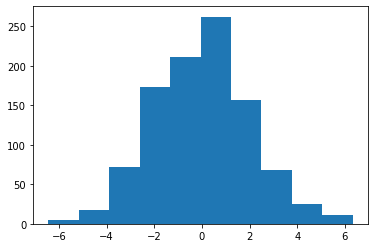

In [91]:
plt.hist(X[0]) # creates a histogrm based of the data collected up to this point

In [92]:
X = GPU_data(X)
Y = GPU_data(Y)

In [93]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [94]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [95]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [96]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size) # sets the size for the torch.rand
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [97]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [98]:
X.shape

torch.Size([50, 1000])

In [99]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) # i honestly am confused on what this code means
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [100]:
def model(x,w):

    return x@w[0]

In [101]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [102]:
wb.init(project="Linear_Model_Photo_1"); # create folder for linear project one and consists of the runs documented
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-70-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [103]:
# Out of my three runs, the best was .5008 the worst was .3445, and the average would be .4382